Objective: 
Find the possible futuristic movement of the stock 'GOOG' based on its price for the past 5 years.

Steps: 
1. Get 5 years of data
2. Create 50DMA and 200 DMA
3. Plot it with the Actual Price.
4. Basic EDA on the Data
5. FIt Statsmodel OLS to find the best possible feature

In [5]:
pip install yfinance


Note: you may need to restart the kernel to use updated packages.


In [6]:
#import liblraries
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [7]:
google=yf.Ticker('GOOG')

In [8]:
#5 years of data
df=google.history('5Y')

In [9]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-04-17 00:00:00-04:00,61.650002,62.028000,61.390999,61.817001,24438000,0.0,0.0
2019-04-18 00:00:00-04:00,61.959000,62.099998,61.730499,61.818501,26636000,0.0,0.0
2019-04-22 00:00:00-04:00,61.799500,62.454498,61.415501,62.442001,16146000,0.0,0.0
2019-04-23 00:00:00-04:00,62.534500,63.450001,62.319000,63.227501,26398000,0.0,0.0
2019-04-24 00:00:00-04:00,63.206001,63.400501,62.750000,62.799999,20376000,0.0,0.0


In [10]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-04-11 00:00:00-04:00,158.339996,161.119995,157.929993,160.789993,17841700,0.0,0.0
2024-04-12 00:00:00-04:00,159.404999,161.699997,158.600006,159.190002,16968200,0.0,0.0
2024-04-15 00:00:00-04:00,160.279999,160.830002,156.149994,156.330002,21140900,0.0,0.0
2024-04-16 00:00:00-04:00,155.639999,157.229996,155.050003,156.000000,15404000,0.0,0.0
2024-04-17 00:00:00-04:00,157.190002,158.681000,156.134995,157.244995,8867548,0.0,0.0


In [11]:
df.shape

(1259, 7)

In [12]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03,1259.0,1259.000000
mean,103.844831,105.048155,102.781706,103.937621,2.878703e+07,0.0,0.015886
std,30.248377,30.503552,29.977345,30.234059,1.284244e+07,0.0,0.563660
min,52.145000,52.374500,50.676800,51.811501,6.936000e+06,0.0,0.000000
25%,74.345501,75.155422,73.601498,74.297249,2.067565e+07,0.0,0.000000
50%,105.230003,106.540001,104.419998,105.309998,2.565400e+07,0.0,0.000000
75%,132.117500,133.539246,130.663498,132.145996,3.289900e+07,0.0,0.000000
max,160.279999,161.699997,158.600006,160.789993,1.241400e+08,0.0,20.000000


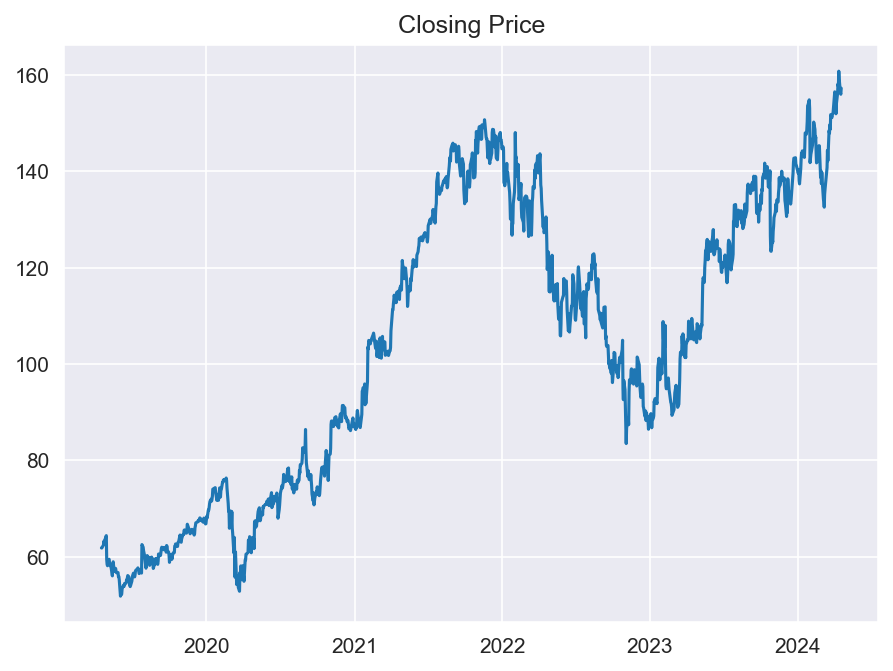

In [14]:
#overview of closing price before calculating DMAs 
sns.set_style('darkgrid')
plt.figure(figsize=(7,5),dpi=150)
plt.title('Closing Price')
plt.plot(df['Close'])

In [15]:
#calculate 50DMA
df['fiftyDMA']=df['Close'].rolling(50).mean()

In [16]:
#calculate 200DMA
df['thDMA']=df['Close'].rolling(200).mean()

In [17]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,fiftyDMA,thDMA
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03,1259.0,1259.000000,1210.000000,1060.000000
mean,103.844831,105.048155,102.781706,103.937621,2.878703e+07,0.0,0.015886,103.920161,104.548634
std,30.248377,30.503552,29.977345,30.234059,1.284244e+07,0.0,0.563660,28.979150,24.852415
min,52.145000,52.374500,50.676800,51.811501,6.936000e+06,0.0,0.000000,55.710860,61.674130
25%,74.345501,75.155422,73.601498,74.297249,2.067565e+07,0.0,0.000000,76.247628,80.979657
50%,105.230003,106.540001,104.419998,105.309998,2.565400e+07,0.0,0.000000,106.704450,107.084536
75%,132.117500,133.539246,130.663498,132.145996,3.289900e+07,0.0,0.000000,133.101992,126.934000
max,160.279999,161.699997,158.600006,160.789993,1.241400e+08,0.0,20.000000,147.118499,139.273730


In [22]:
#remove dividends and stock split since there is no relevant informantion
df.drop(columns=['Stock Splits'], inplace=True)

In [23]:
df.head()

,Open,High,Low,Close,Volume,fiftyDMA,thDMA
Date,,,,,,,
2019-04-17 00:00:00-04:00,61.650002,62.028000,61.390999,61.817001,24438000,NaN,NaN
2019-04-18 00:00:00-04:00,61.959000,62.099998,61.730499,61.818501,26636000,NaN,NaN
2019-04-22 00:00:00-04:00,61.799500,62.454498,61.415501,62.442001,16146000,NaN,NaN
2019-04-23 00:00:00-04:00,62.534500,63.450001,62.319000,63.227501,26398000,NaN,NaN
2019-04-24 00:00:00-04:00,63.206001,63.400501,62.750000,62.799999,20376000,NaN,NaN


In [24]:
df.tail()

,Open,High,Low,Close,Volume,fiftyDMA,thDMA
Date,,,,,,,
2024-04-11 00:00:00-04:00,158.339996,161.119995,157.929993,160.789993,17841700,146.002799,137.164800
2024-04-12 00:00:00-04:00,159.404999,161.699997,158.600006,159.190002,16968200,146.350599,137.365700
2024-04-15 00:00:00-04:00,160.279999,160.830002,156.149994,156.330002,21140900,146.622999,137.541950
2024-04-16 00:00:00-04:00,155.639999,157.229996,155.050003,156.000000,15404000,146.872199,137.721900
2024-04-17 00:00:00-04:00,157.190002,158.681000,156.134995,157.244995,8867548,147.118499,137.903275


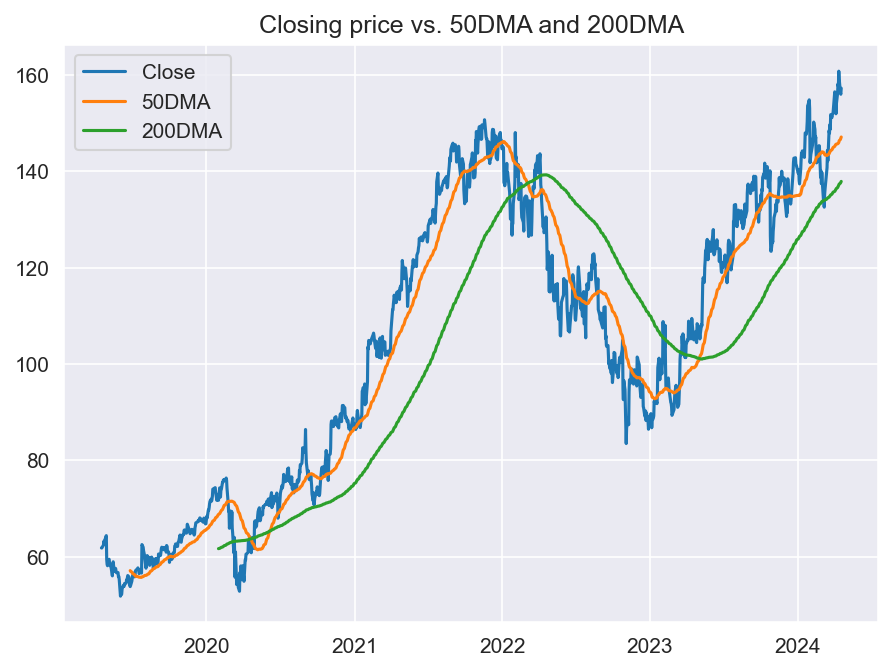

In [26]:
#plot closing price vs. 50DMA and 200DMA
sns.set_style('darkgrid')
plt.figure(figsize=(7,5), dpi=150)
plt.title('Closing price vs. 50DMA and 200DMA')
plt.plot(df['Close'],label='Close')
plt.plot(df['fiftyDMA'],label='50DMA')
plt.plot(df['thDMA'],label='200DMA')
plt.legend()

Inference form the graph
1. 50DMA and 200DMA are relevant indicators
2. closing price above the 50DMA and 200DMA, it is uptrend and if it is below, downtrend.
3. the dip at the March 2020 was Covid 19 market crash. 

# Finding the possible future movement of the stock

<Axes: >

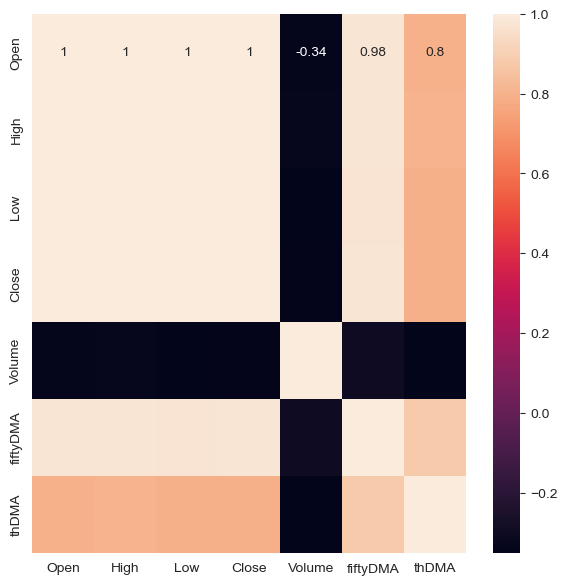

In [29]:
#analyze correlation between each variables
plt.figure(figsize=(7,7), dpi=100)
sns.heatmap(df.corr(),annot=True)

Infrernce from the heatmap
1. Closing price has very high correlation with almost all variables except the volume. 

<Axes: title={'center': 'Distplot 50 DMA'}, xlabel='fiftyDMA', ylabel='Density'>

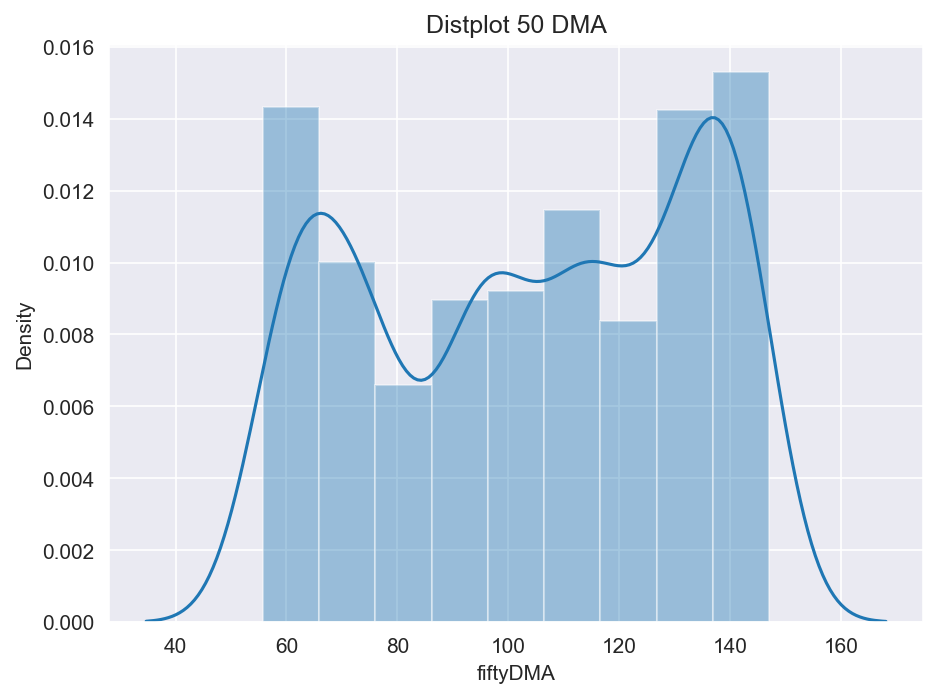

In [30]:
# plot distplot of 50DMA
sns.set_style('darkgrid')
plt.figure(figsize=(7,5),dpi=150)
plt.title('Distplot 50 DMA')
sns.distplot(df['fiftyDMA'])

<Axes: title={'center': 'Distplot closing price'}, xlabel='Close', ylabel='Density'>

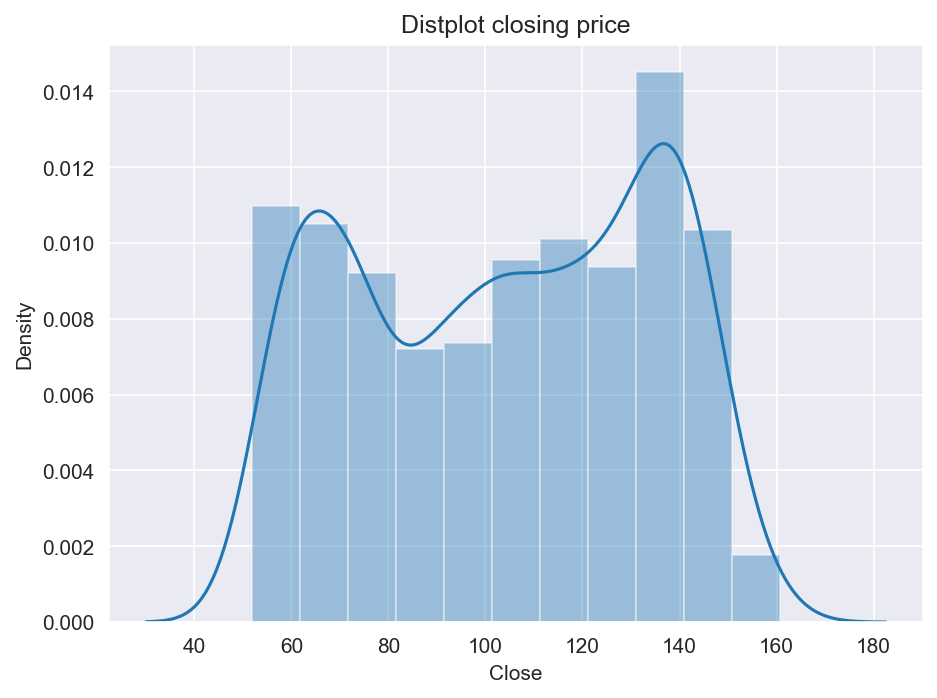

In [31]:
# plot distplot of closing price
sns.set_style('darkgrid')
plt.figure(figsize=(7,5),dpi=150)
plt.title('Distplot closing price')
sns.distplot(df['Close'])

In [32]:
import statsmodels.formula.api as smf

In [35]:
model=smf.ols(formula='Close ~ fiftyDMA',data=df)
model=model.fit()

In [36]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                 2.285e+04
Date:                Wed, 17 Apr 2024   Prob (F-statistic):               0.00
Time:                        11:38:05   Log-Likelihood:                -3993.4
No. Observations:                1210   AIC:                             7991.
Df Residuals:                    1208   BIC:                             8001.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4295      0.703      4.877      0.000       2.050       4.809
fiftyDMA       0.9854      0.007    151.175      0.000       0.973       0.998
==============================================================================
Omnibus:                       80.918   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.884
Skew:                          -0.664   Prob(JB):                     1.51e-21
Kurtosis:                       3.375   Cond. No.                         402.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Inferences from the summary
1. Good r2 scores and coef
2. since they are highly correlated, ~1, it isn't wise to fit the model based on the parameters in real life